# How does sin transform eliminate branch cuts in beta(Z)?

If it even does?

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex
from IPython.display import Video

%matplotlib widget
plt.style.use('dark_background')

In [73]:
A = SlabExact(symmetric=True)

In [104]:
Kn = A.K0 * A.n0

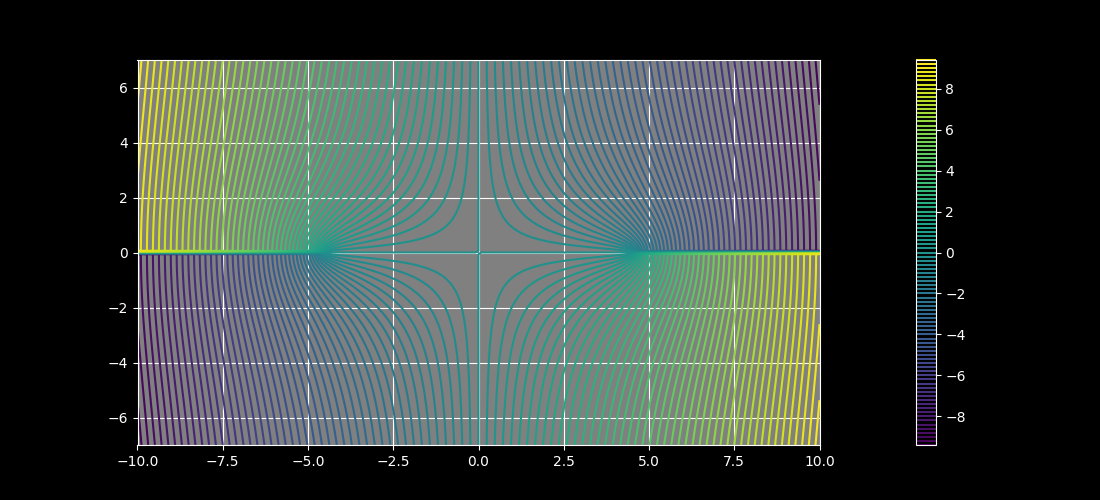

In [181]:
plt.close('all')
plot_complex(A.Beta_from_Z, -10, 10, -7, 7, part='imag', rref=120, iref=120, levels=100,
            figsize=(11,5))

In [106]:
ims = np.linspace(-np.pi, np.pi, 500)
x0 = 1.1*Kn
zs = x0 + 1j * ims
fs = A.Beta_from_Z(zs)

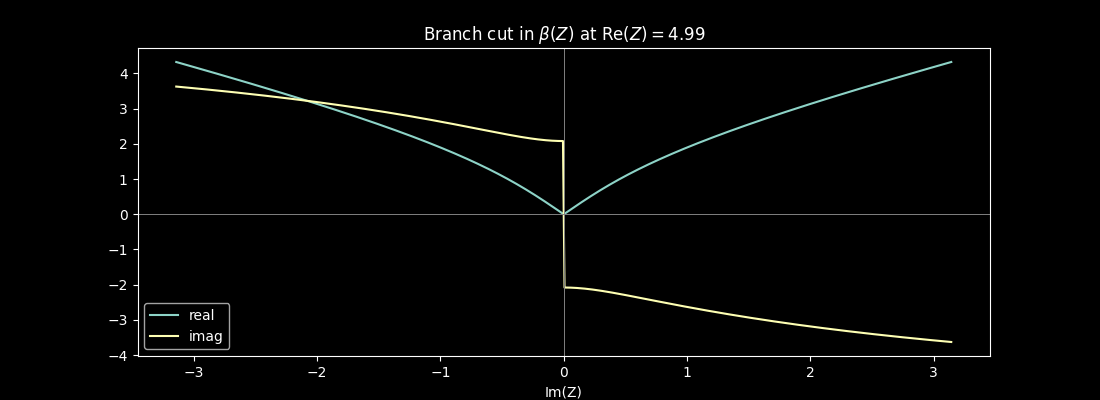

In [107]:
plt.close('all')
plt.figure(figsize=(11,4))
plt.plot(ims, fs.real, label='real')
plt.plot(ims, fs.imag, label='imag')
plt.title('Branch cut in $\\beta(Z)$ at Re$(Z) = %.2f$'%x0)
plt.xlabel('Im(Z)')
plt.axhline(0, linewidth=.7, color='gray')
plt.axvline(0, linewidth=.7, color='gray')
plt.legend()

In [171]:
transformed_beta_of_Z = lambda Psi : A.Beta_from_Z(Kn * np.sin(Psi))

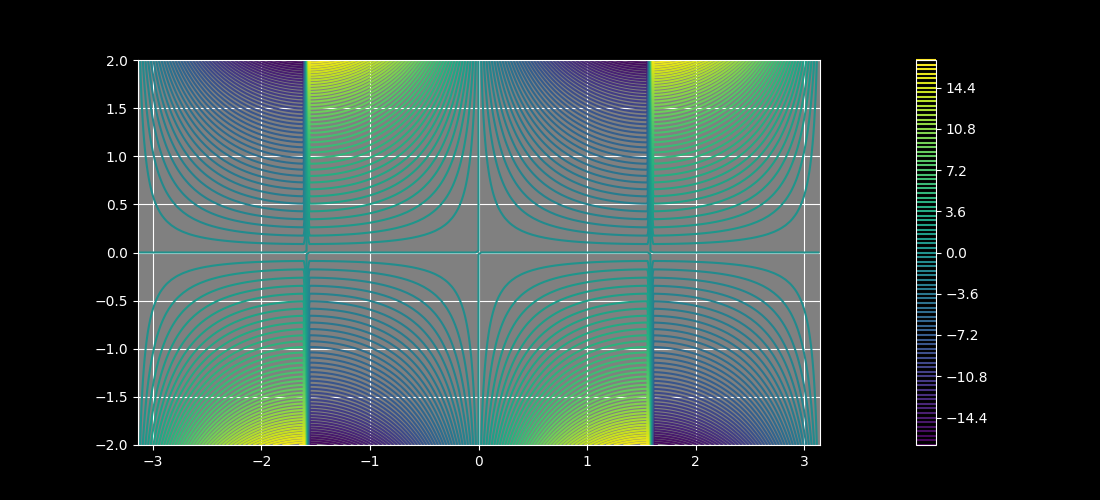

In [172]:
plt.close('all')
plot_complex(transformed_beta_of_Z, -np.pi, np.pi, -2, 2, part='imag',
             rref=120, iref=120, levels=100, figsize=(11,5),
            log_abs=False)

In [173]:
res = np.linspace(-np.pi, np.pi, 500)
y0 = 1
zs2 = res + 1j * y0
fs2 = transformed_beta_of_Z(zs2)

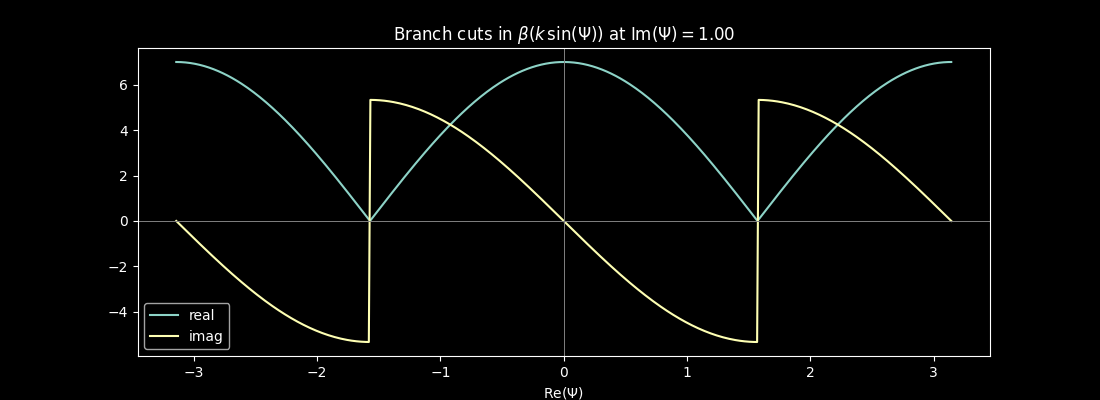

In [174]:
plt.close('all')
plt.figure(figsize=(11,4))
plt.plot(ims, fs2.real, label='real')
plt.plot(ims, fs2.imag, label='imag')
plt.title('Branch cuts in $\\beta(k\,\sin(\Psi))$ at Im$(\Psi) = %.2f$'%y0)
plt.xlabel('Re$(\Psi)$')
plt.axhline(0, linewidth=.7, color='gray')
plt.axvline(0, linewidth=.7, color='gray')
plt.legend()

Issues still seem to persist due to:

$$\beta(\sin(\Psi) = \sqrt{\cos^2(\Psi)} = \pm \cos(\Psi)$$

having its own branch cuts

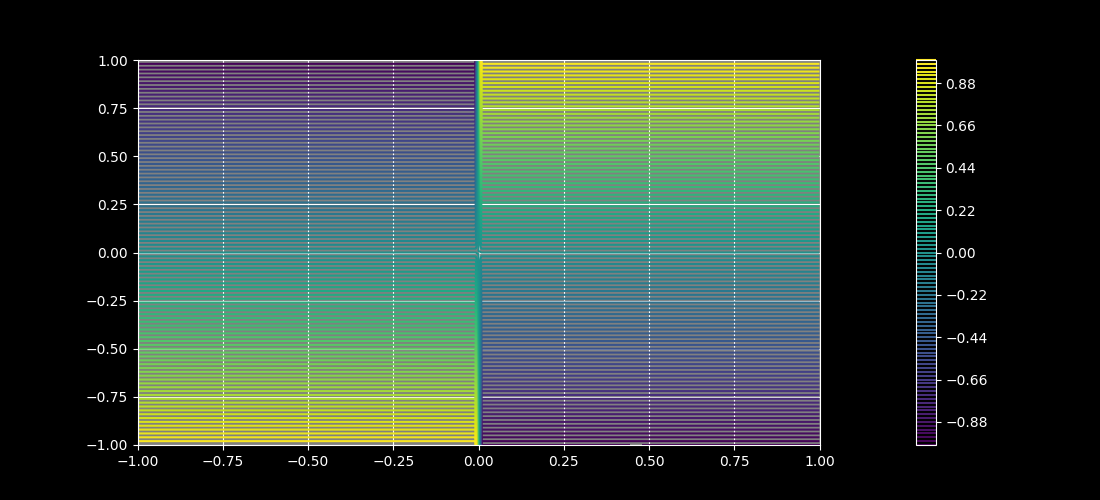

In [175]:
plt.close('all')
plot_complex(lambda Z: np.sqrt(Z**2), -1, 1, -1, 1, part='imag',
             rref=120, iref=120, levels=100, figsize=(11,5),
            log_abs=False)

In [176]:
res2 = np.linspace(-1, 1, 500)
y02 = .25
zs3 = res2 + 1j * y02
fs3 = np.sqrt(zs3**2)

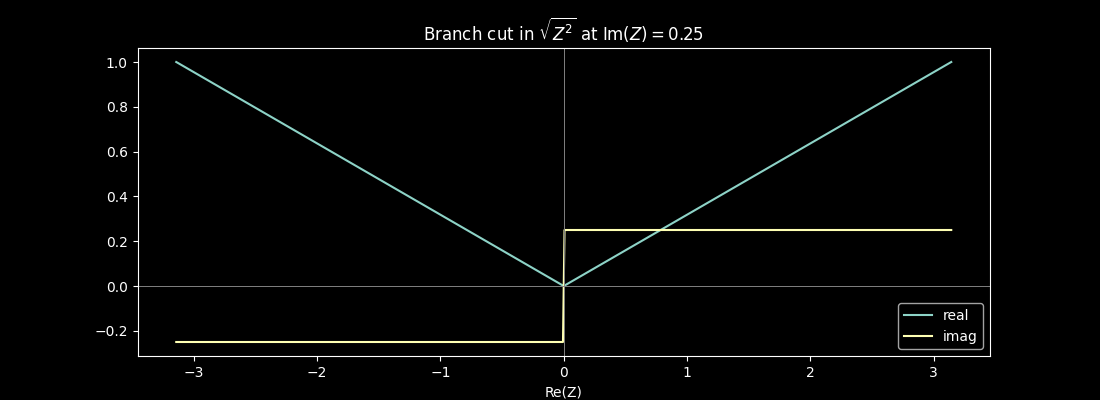

In [177]:
plt.close('all')
plt.figure(figsize=(11,4))
plt.plot(ims, fs3.real, label='real')
plt.plot(ims, fs3.imag, label='imag')
plt.title('Branch cut in $\sqrt{Z^2}$ at Im$(Z) = %.2f$'%y02)
plt.xlabel('Re(Z)')
plt.axhline(0, linewidth=.7, color='gray')
plt.axvline(0, linewidth=.7, color='gray')
plt.legend()

So cuts persist wherever $\cos(\Psi) = 0 + iy'$, so wherever $\Psi = \pi/2 + iy$ where $y' = \sinh(y)$